![](../docs/banner.png)

# Chapter 4: Imports

## 3. Importing
<hr>

Python can access code in another module by importing it. This is done using the `import` statement, which you've probably seen a few times already. We'll discuss importing more in DSCI 524 and you can read all about it in the [Python documentation](https://docs.python.org/3/reference/import.html) but for now, it's easiest to see it in action.

### Ways of Importing Things

I've written a `.py` file called `wallet.py` that contains a class `Wallet` that can be used to store, spend, and earn cash. I recommend taking a look at that file on GitHub before moving on.

Let's `import` the code from `wallet.py` . We can import our `.py` file (our module) simply by:

In [ ]:
import wallet

We can take a look at all the useable parts of that module by typing `dir(wallet)`:

In [ ]:
dir(wallet)

We can import a package using an alias with the `as` keyword:

In [ ]:
import wallet as w

In [ ]:
w.Wallet(100)

In [ ]:
w.InsufficientCashError()

In [ ]:
w.my_print("Hello World!")

And we can import just a specific function/class/variable from our module:

In [ ]:
from wallet import Wallet

In [ ]:
Wallet(100) # now I can refer to it without the module name prefix

You can even mix up all these methods:

In [ ]:
from wallet import Wallet as w

In [ ]:
w(100)

It's also possible to import everything in a module, though this is generally not recommended:

In [ ]:
from wallet import *

In [ ]:
Wallet(100)

In [ ]:
InsufficientCashError()

In [ ]:
my_print("Amir")

#### Importing Functions from Outside your Working Directory

I could do `import wallet` above because `wallet.py` is in my current working directory. But there are a few extra steps needed if it is in a different location. I've included a script called `hello.py` in a `data/` sub-directory of the directory housing this notebook. All it has in it is:

```python
PLANET = "Earth"


def hello_world():
    print(f"Hello {PLANET}!")
```

Unfortunately I can't do this:

In [ ]:
from hello import hello_world

What I need to do is add this directory location to the paths that Python searches through when looking to import something. I usually do this using the `sys` module:

In [ ]:
import sys
sys.path.append('data/')
sys.path # display the current paths Python is looking through

See that `data/` is now a valid path. So now I can import from `hello.py`:

In [ ]:
from hello import hello_world, PLANET

In [ ]:
PLANET  # note that I can import variable defined in a .py file!

In [ ]:
hello_world()

### Packages

As your code gets more complex, grows in modules, and you wish to share it, you'll want to turn it into a Python package. Packages are logical collections of modules that can be easily imported. If you're interested in creating your own packages, take a look at the [py-pkgs book](https://ubc-mds.github.io/py-pkgs/). For now, we'll be using other people's popular data science packages, specifically, next chapter we'll look at `numpy`: "the fundamental package for scientific computing with Python".

#### Importing Installed Packages

In the next few chapters we'll be using the `numpy` and `pandas` packages, which are probably the most popular for data science. When you install those packages, they are put in a location on your computer that Python already knows about, so we can simply import them at will.

In [ ]:
import numpy as np

In [ ]:
np.array([1, 2, 3])

In [ ]:
np.random.randint(0, 10, 3)

## 4. Intriguing Behaviour in Python
<hr>

### References

What do you think the code below will print?

In [ ]:
x = 1
y = x

print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")

x = 2

print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

And how about the next one?

In [ ]:
x = [1]
y = x

print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")

x[0] = 2

print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

In Python, the list `x` is a **reference** to an object in the computer's memory. When you set `y = x` these two variables now refer to the same object in memory - the one that `x` referred to. Setting `x[0] = 2` modifies the object in memory. So `x` and `y` are both modified (it makes no different if you set `x[0] = 2` or `y[0] = 2`, both modify the same memory).
 
Here's an analogy that might help understand what's going on:
- I share a Dropbox folder (or git repo) with you, and you modify it -- I sent you _the location of the stuff_ (this is like the list case)
- I send you an email with a file attached, you download it and modify the file -- I sent you _the stuff itself_ (this is like the integer case)

Okay, what do you think will happen here:

In [ ]:
x = [1]
y = x
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")

x = [2] # before we had x[0] = 2

print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

Here we are not modifying the contents of `x`, we are setting `x` to refer to a new list `[2]`.

### Additional Weirdness

We can use `id()` to return the unique id of an object in memory.

In [ ]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])  # this is a numpy array which we'll learn more about next chapter
y = x
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

x = x + 5

print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = x
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")

x += 5

print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

So, it turns out `x += 5` is not identical `x = x + 5`. The former modifies the contents of `x`. The latter first evaluates `x + 5` to a new array of the same size, and then overwrites the name `x` with a reference to this new array.

But there's good news - we don't need to memorize special rules for calling functions. Copying happens with `int`, `float`, `bool`, (maybe some other ones I'm forgetting?), the rest is "by reference". Now you see why we care if objects are mutable or immutable... passing around a reference can be dangerous! General rule - if you do `x = ...` then you're not modifying the original, but if you do `x.SOMETHING = y` or `x[SOMETHING] = y` or `x *= y` then you probably are.

### `copy` and `deepcopy`

We can force the certain copying behaviour using the `copy` library if we want to:

In [ ]:
import copy  # part of the standard library

In [ ]:
x = [1]
y = x
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")

x[0] = 2
print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")



In [ ]:
x = [1]
y = copy.copy(x)  # We "copied" x and saved that new object as y
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")

x[0] = 2

print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")


Ok, so what do you think will happen here?

In [ ]:
x = [[1], [2, 99], [3, "hi"]]  # a list of lists

y = copy.copy(x)
print("After copy.copy():")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")
print("\n")


x[0][0] = "pikachu"
print("")
print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")


But wait.. we used `copy`, why are `x` and `y` both changed in the latter example? `copy` makes the _containers_ different, i.e., only the outer list. But the outer lists contain references to objects which were not copied! This is what happens after `y = copy.copy(x)`:

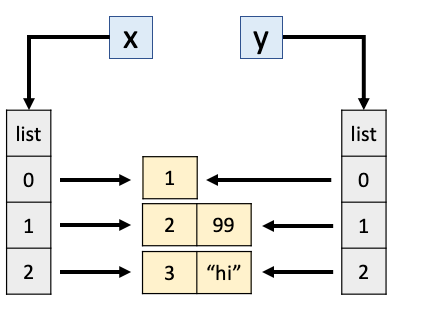

We can use `is` to tell apart these scenarios (as opposed to `==`). `is` tells us if two objects are referring to the same object in memory, while `==` tells us if their contents are the same:

In [ ]:
x == y # they are both lists containing the same lists

In [ ]:
x is y # but they are not the *same* lists of lists

So, by that logic we should be able to append to `y` without affecting `x`:

In [ ]:
y.append(5)

print(x)
print(y)

In [ ]:
x is y

That makes sense, as weird as it seems:

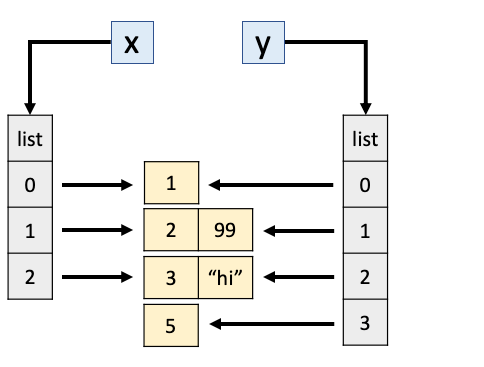


In short, `copy` only copies one level down. What if we want to copy everything? i.e., even the inner lists in our outer list... Enter our friend `deepcopy`:

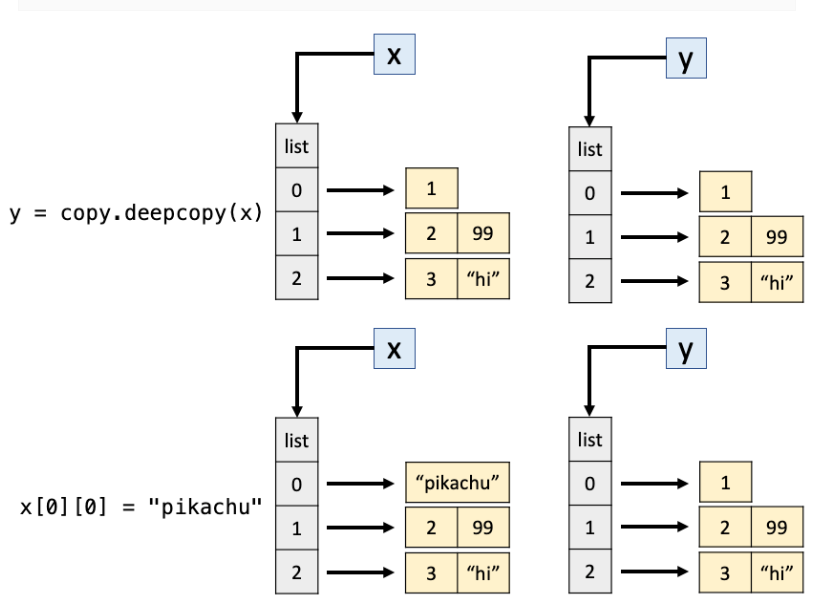

In [ ]:
x = [[1], [2, 99], [3, "hi"]]

y = copy.deepcopy(x)
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

x[0][0] = "pikachu"
print("After modifying x:")
print(f"x has the value: {x}, id: {id(x)}")
print(f"y has the value: {y}, id: {id(y)}")

![](img/chapter4/deep-copy.png)

```{tip}
If you're interested, you can find a whole compilation of more intriguing behaviour in Python [here](https://github.com/satwikkansal/wtfpython/blob/master/README.md)!
```